In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [65]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### 1. Untuk feature/column Landsize, Distance, & Price, hitung dan beri penjelasan (insight) terkait:

- Titik Pusat Data (Central Tendency)
- Persebaran Data (Dispersion)
- Distribusi Data (Distribution)

### Central Tendency

##### mean - landsize

In [66]:
df['Landsize'].mean()

558.4161266568483

#### median - landsize

In [67]:
df['Landsize'].median()

440.0

#### mode - landsize

In [68]:
df['Landsize'].mode()

0    0.0
dtype: float64

##### mean - distance

In [69]:
df['Distance'].mean()

10.137776141384117

##### median - landsize

In [70]:
df['Distance'].median()

9.2

##### mode - landsize

In [71]:
df['Distance'].mode()

0    11.2
dtype: float64

##### mean - price

In [72]:
df['Price'].mean()

1075684.079455081

##### median - price

In [73]:
df['Price'].median()

903000.0

##### mode - price

In [74]:
df['Price'].mode()

0    1100000.0
dtype: float64

### Dispersion

#### Variance

In [109]:
df.loc[:,"Landsize"].var()

15925440.991933756

In [110]:
df.loc[:,"Distance"].var()

34.44193245743184

In [111]:
df.loc[:,"Price"].var()

408718202199.9009

#### Standard Deviation

In [114]:
df.loc[:,"Landsize"].std()

3990.6692411090344

In [113]:
df.loc[:,"Distance"].std()

5.868724943071692

In [112]:
df.loc[:,"Price"].std()

639310.7242960194

### Distribution

In [77]:
df.skew()

Rooms             0.376478
Price             2.239624
Distance          1.676937
Postcode          4.076152
Bedroom2          0.774082
Bathroom          1.377406
Car               1.369676
Landsize         95.237400
BuildingArea     77.691541
YearBuilt        -1.541279
Lattitude        -0.426695
Longtitude       -0.210991
Propertycount     1.069339
dtype: float64

Based on the data above, Landsize, Price, dan  Distance datas are highly skewed.

### 2. Carilah data outlier dan beri penjelasan (insight) pada feature/column Landsize & Distance ! Tambahkan plot untuk menampilkan adanya data outlier!

In [57]:
def find_anomalies(data):
    anomalies = []
    random_data_std = np.std(data)
    random_data_mean = np.mean(data)
    anomaly_gate = random_data_std * 2
    
    lower_limit = random_data_mean - anomaly_gate 
    upper_limit = random_data_mean + anomaly_gate
    print(f'batas bawah: {lower_limit}')
    print(f'batas atas: {upper_limit}')

    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [58]:
find_anomalies(df['Landsize'])

batas bawah: -7422.628486436792
batas atas: 8539.460739750488


[75100.0,
 15900.0,
 10100.0,
 8680.0,
 15100.0,
 37000.0,
 21700.0,
 41400.0,
 14500.0,
 17200.0,
 17200.0,
 15900.0,
 21715.0,
 17200.0,
 9838.0,
 37000.0,
 8888.0,
 38490.0,
 14196.0,
 76000.0,
 17200.0,
 433014.0,
 40468.0,
 16000.0,
 17200.0,
 12300.0,
 20200.0,
 14294.0,
 9338.0,
 44500.0,
 9405.0]

In [59]:
def find_anomalies(data):
    anomalies = []
    random_data_std = np.std(data)
    random_data_mean = np.mean(data)
    anomaly_gate = random_data_std * 2
    
    lower_limit = random_data_mean - anomaly_gate 
    upper_limit = random_data_mean + anomaly_gate
    print(f'batas bawah: {lower_limit}')
    print(f'batas atas: {upper_limit}')

    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [60]:
find_anomalies(df['Distance'])

batas bawah: -1.5992415773817346
batas atas: 21.87479386014997


[23.2,
 23.2,
 35.2,
 25.0,
 34.7,
 23.0,
 23.0,
 23.0,
 24.7,
 24.7,
 24.7,
 22.2,
 25.9,
 38.0,
 36.9,
 38.0,
 45.9,
 32.3,
 45.2,
 25.2,
 25.2,
 31.7,
 31.7,
 25.9,
 25.9,
 34.1,
 34.1,
 23.8,
 23.5,
 35.4,
 34.7,
 31.7,
 31.7,
 31.7,
 27.0,
 25.5,
 25.5,
 27.2,
 23.2,
 23.2,
 23.2,
 27.0,
 25.0,
 25.0,
 25.0,
 25.0,
 31.2,
 31.2,
 31.2,
 31.2,
 27.0,
 27.0,
 23.0,
 24.7,
 24.7,
 24.7,
 22.2,
 28.8,
 24.8,
 24.8,
 38.0,
 36.9,
 32.3,
 25.2,
 31.7,
 29.8,
 31.7,
 26.5,
 26.5,
 23.5,
 35.4,
 31.7,
 31.7,
 23.2,
 23.2,
 23.2,
 35.2,
 34.9,
 34.9,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 24.7,
 24.7,
 22.2,
 22.2,
 24.8,
 45.9,
 32.3,
 41.0,
 31.7,
 29.8,
 25.9,
 25.9,
 26.5,
 26.5,
 22.7,
 23.5,
 23.5,
 35.4,
 34.7,
 31.7,
 23.2,
 23.2,
 39.8,
 35.2,
 31.2,
 27.0,
 23.0,
 23.0,
 23.0,
 24.7,
 22.2,
 22.2,
 22.2,
 38.0,
 38.0,
 38.0,
 38.0,
 25.2,
 31.7,
 29.8,
 29.8,
 31.6,
 34.1,
 22.7,
 47.3,
 47.4,
 23.5,
 34.7,
 22.2,
 35.4,
 34.6,
 31.7,
 23.2,
 35.2,
 35.2,
 34.9,
 27.1,
 23.0,
 23.0,

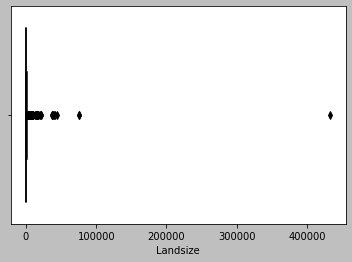

In [123]:
sns.boxplot(x='Landsize', data=df)

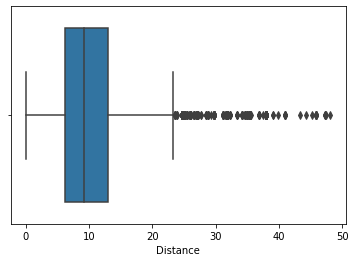

In [62]:
sns.boxplot(x='Distance', data=df)

The two boxplots shows that data for landsizes and distance are both highly skewed.

### 3.Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column Landsize & YearBuilt. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!



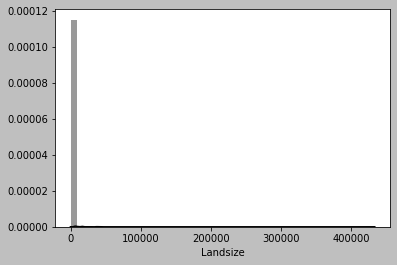

In [97]:
sns.distplot(df['Landsize'])

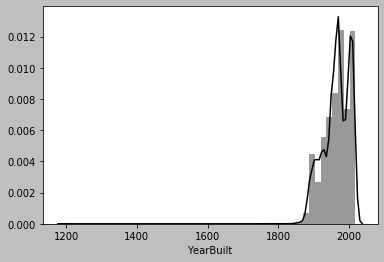

In [149]:
sns.distplot(df['YearBuilt'])

### 4. Tampilkan perkembangan rata-rata harga (price) rumah berdasarkan tahun pembangunan rumah (Year) menggunakan plot yang tepat! Jelaskan (insight) perkembangan rata-rata harga rumah dari plot yang Anda buat!

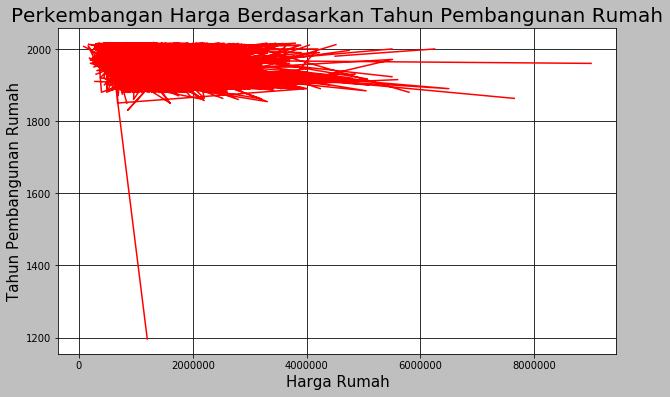

In [147]:
plt.figure(figsize = (10, 6))
x = df['Price']
y = df['YearBuilt'] 
plt.plot(x, y, 'red')
plt.title('Perkembangan Harga Berdasarkan Tahun Pembangunan Rumah', size=20) 
plt.xlabel('Harga Rumah', size=15) 
plt.ylabel('Tahun Pembangunan Rumah', size=15) 
plt.grid() 
plt.savefig('Perkembangan Harga.png')
plt.show()

### 5. Di antara Landsize, Distance, & Rooms, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Price? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

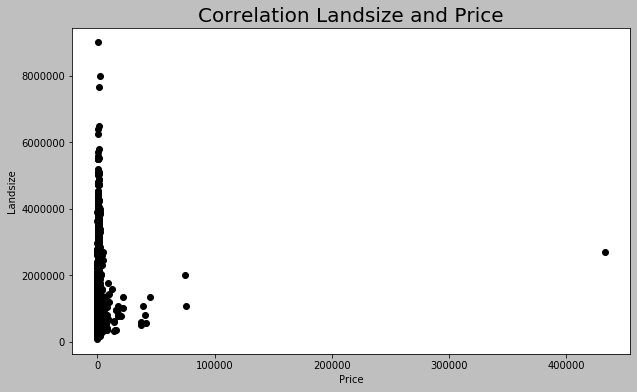

In [125]:
plt.figure(figsize = (10,6))
plt.scatter(df['Landsize'], df['Price'])
plt.title('Correlation Landsize and Price', size=20)
plt.xlabel('Price')
plt.ylabel('Landsize')
plt.savefig('Correlation Landsize and Price')
plt.show()

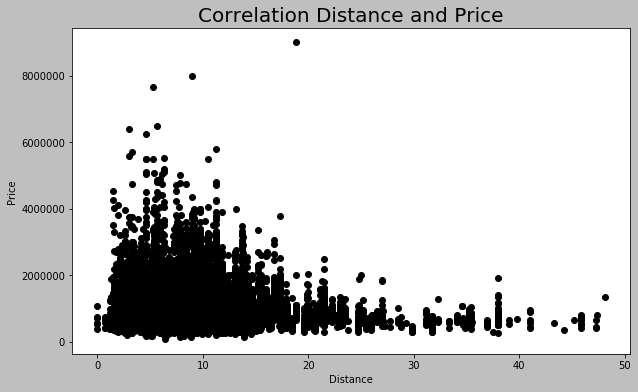

In [148]:
plt.figure(figsize = (10,6))
plt.scatter(df['Distance'], df['Price'])
plt.title('Correlation Distance and Price', size=20)
plt.xlabel('Distance')
plt.ylabel('Price')
plt.savefig('Correlation Distance and Price')
plt.show()

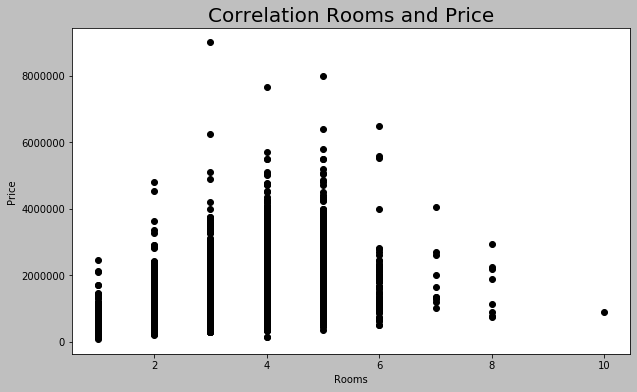

In [117]:
plt.figure(figsize = (10,6))
plt.scatter(df['Rooms'], df['Price'])
plt.title('Correlation Rooms and Price', size=20)
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.savefig('Correlation Rooms and Price')
plt.show()

Between Landsize, Distance, and Rooms, Distance seems to be the one with direct correlation with Price. The further the distance, the more affordable the price is. Meanwhile rooms and landsizes doesn't seem to have a clear, direct correlation to the Price of the house.